<a href="https://colab.research.google.com/github/conceptbin/DA_Notebooks/blob/master/Viz02_Population_Gender_rows_location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UN population projection by gender

In [61]:
# Import libraries
import pandas as pd
import seaborn as sns
sns.set_context("notebook") # Size preset for graph

Dataset: [UN World Population Prospects 2022](https://population.un.org/wpp/Download/Standard/CSV/) in CSV format. Follow the link for the full explanation of what each category (column) means. Population numbers are written in thousands (i.e., 1000 = 1 mil).

In [62]:
# Load data from local file
file_url = r'https://github.com/conceptbin/DA_Notebooks/raw/master/visualisations/data/WPP2022_TotalPopulationBySex.csv' # Path in Win11 format. You need to re-enter the path for Mac/Linux
df = pd.read_csv(file_url, low_memory=False)

In [63]:
df.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950.5,1245362.965,1253959.192,2499322.157,19.166
1,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1951,1951.5,1267473.182,1275657.198,2543130.380,19.502
2,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1952,1952.5,1291399.982,1298870.917,2590270.899,19.864
3,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1953,1953.5,1316659.222,1323619.574,2640278.797,20.247
4,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1954,1954.5,1342923.171,1349056.168,2691979.339,20.643


In [64]:
df['Location'].unique()

array(['World', 'Sub-Saharan Africa', 'Northern Africa and Western Asia',
       'Central and Southern Asia', 'Eastern and South-Eastern Asia',
       'Latin America and the Caribbean',
       'Oceania (excluding Australia and New Zealand)',
       'Australia/New Zealand', 'Europe and Northern America',
       'More developed regions', 'Less developed regions',
       'Least developed countries',
       'Less developed regions, excluding least developed countries',
       'Less developed regions, excluding China',
       'Land-locked Developing Countries (LLDC)',
       'Small Island Developing States (SIDS)', 'High-income countries',
       'Middle-income countries', 'Upper-middle-income countries',
       'Lower-middle-income countries', 'Low-income countries',
       'No income group available', 'Africa', 'Eastern Africa', 'Burundi',
       'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya',
       'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique',
       'Réunion', 'R

In [65]:
df.shape

(359502, 18)

Filter by country

In [66]:
# Select country (Location)
location_list = ['Middle Africa','Northern Africa','Southern Africa','Western Africa', 'Eastern Africa']
df = df[df['Location'].isin(location_list)]

Select population projection variants to plot.

In [67]:
# Projection variant types
df['Variant'].unique()

array(['Medium', 'High', 'Low', 'Constant fertility',
       'Instant replacement', 'Zero migration', 'Constant mortality',
       'No change', 'Momentum', 'Instant replacement zero migration',
       'Median PI', 'Upper 80 PI', 'Lower 80 PI', 'Upper 95 PI',
       'Lower 95 PI'], dtype=object)

In [68]:
# Select projection variant(s)
variant_list = ['Medium', 'High', 'Low']
df = df[df['Variant'].isin(variant_list)]

In [69]:
df[:5]

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
55308,49,911,NaN,NaN,NaN,17.0,3,Subregion,903,Middle Africa,2,Medium,1950,1950.5,12787.050,13847.367,26634.416,4.104
55309,49,911,NaN,NaN,NaN,17.0,3,Subregion,903,Middle Africa,2,Medium,1951,1951.5,13041.724,14094.192,27135.916,4.181
55310,49,911,NaN,NaN,NaN,17.0,3,Subregion,903,Middle Africa,2,Medium,1952,1952.5,13304.826,14349.909,27654.734,4.261
55311,49,911,NaN,NaN,NaN,17.0,3,Subregion,903,Middle Africa,2,Medium,1953,1953.5,13574.255,14609.630,28183.885,4.343
55312,49,911,NaN,NaN,NaN,17.0,3,Subregion,903,Middle Africa,2,Medium,1954,1954.5,13851.983,14872.711,28724.694,4.426


In [70]:
df.keys()

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'MidPeriod', 'PopMale', 'PopFemale', 'PopTotal', 'PopDensity'],
      dtype='object')

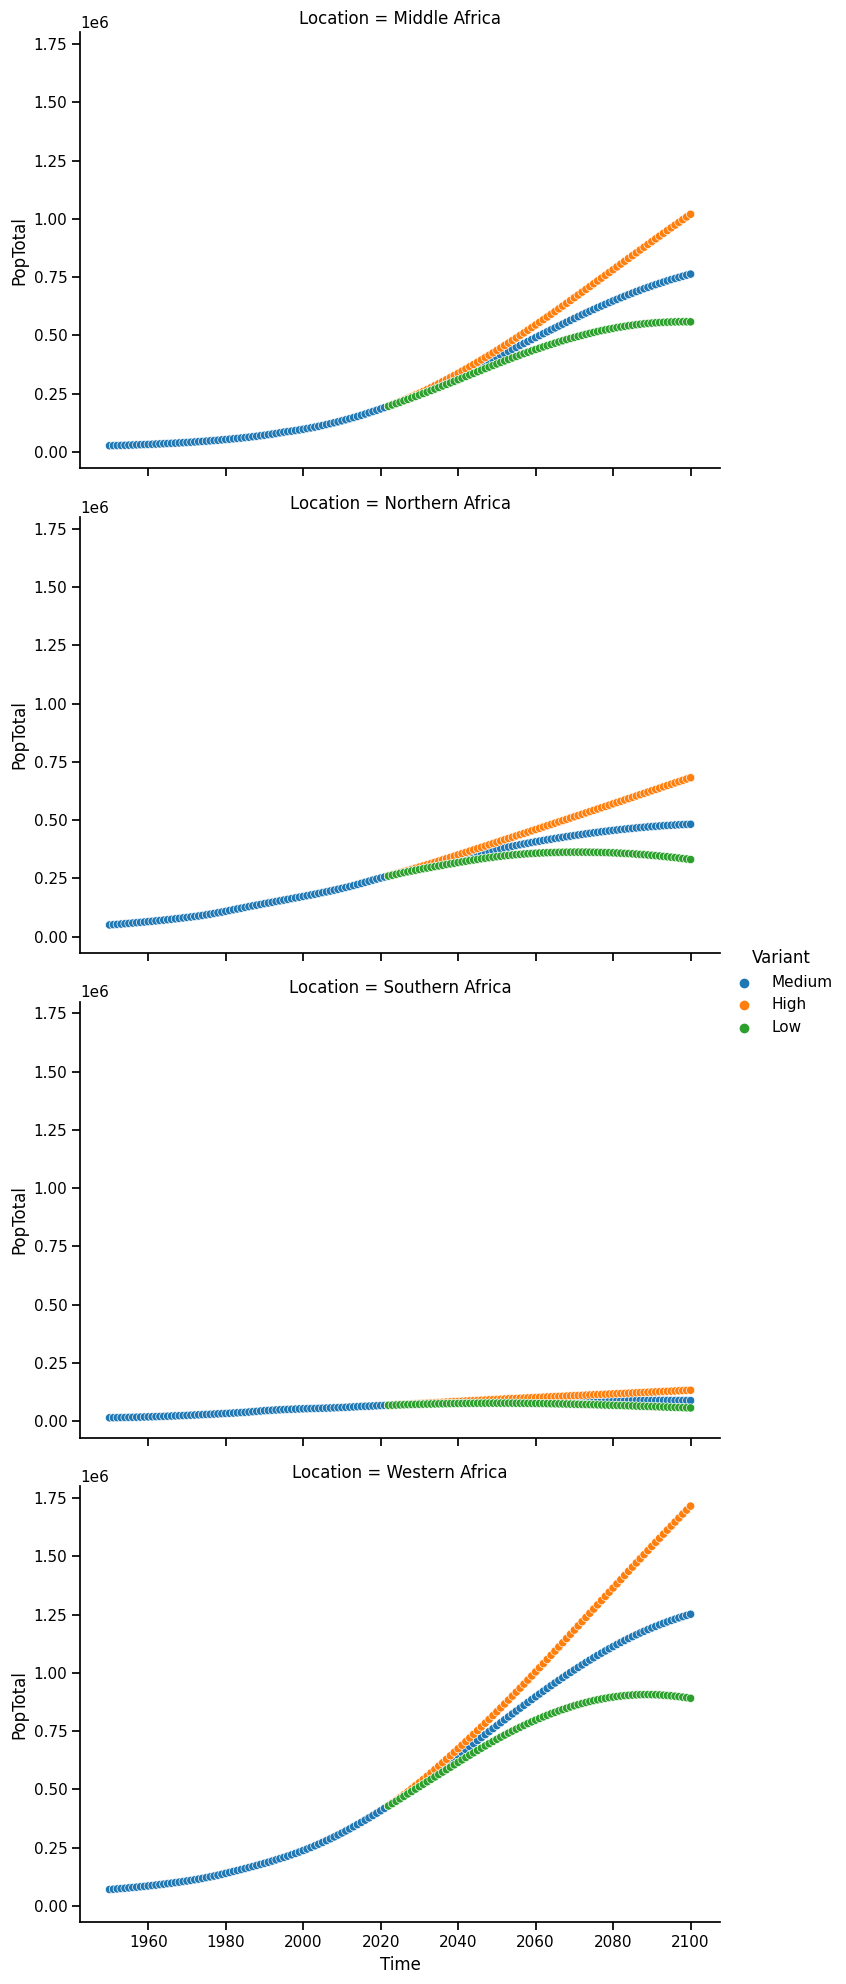

In [71]:
# Plot change over time, comparing variants:
sns.relplot(data=df, x="Time", y="PopTotal", hue='Variant', row='Location', aspect=1.5)

Reshape for plotting

In [ ]:
# Select only columns relevant for the graph:
df = df[['Time', 'Variant', 'PopMale', 'PopFemale']]

In [ ]:
# Melt the PopMale and PopFemale columns into one, in order to assign them to different lines
df = df.melt(["Time", 'Variant'], var_name="Gender", value_name="Number")

In [ ]:
df

In [ ]:
# Plot change over time, comparing variants:
sns.relplot(data=df, x="Time", y="Number", hue='Variant', aspect=1.5)

# Challenge:
Select multiple countries or areas using a list, for plotting a comparison of population projections.

Use the `row` keyword to plot projections for different countries on separate graphs.  